In [1]:
#initializing workspace
import pandas as pd
import matplotlib.pyplot as plt
import trxtools as tt
import os
from pyCRAC.Parsers import GTF2
import pyBigWig
import numpy as np
from trxtools.BigWig import *
from scipy.signal import argrelextrema

pathTAB = "../seq_references/Saccharomyces_cerevisiae.EF4.74.dna.toplevel.shortChrNames.tab"
pathGTF = "../seq_references/Saccharomyces_cerevisiae.EF4.74.shortChNames_with_PolIII_transcripts_extended_slop_intergenic_sort.gtf"
gtf = GTF2.Parse_GTF()
gtf.read_GTF(pathGTF)
gtf.read_TAB(pathTAB)

sequences = pd.read_csv(pathTAB, sep='\t',names=['chr','sequence'],index_col=0)
chr_len = sequences['sequence'].str.len()

pathDir = "../04_BigWig/"
pathMeta = "../06_metadata/"

dinucleotides = pd.read_csv(pathMeta+'/properties_of_dinucleotides.csv', index_col=0)
dinucleotides.index = dinucleotides.reset_index().index.astype(str)+"_"+dinucleotides.index

cleavage_sites = {"5' end" : (300),
                   'A0' : (300+609),
                   'A1' : (300+700),
                   'D'  : (300+2500),
                   'A2' : (300+2712),
                   'A3' : (300+2784),
                   'B1L': (300+2855),
                   'B1S': (300+2861),
                   'E'  : (300+3019),
                   'C1' : (300+3251),
                   'B2' : (300+6647),
                   'B0-1' : (300+6661),
                   'B0-2' : (300+6697),
                   'T1' : (300+6739)}

# print(gtf.strand("RDN37-1"), gtf.chromosome("RDN37-1"), gtf.chromosomeCoordinates("RDN37-1"))
# print(gtf.strand("RDN37-2"), gtf.chromosome("RDN37-2"), gtf.chromosomeCoordinates("RDN37-2"))

flank = 1000

seq1_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][451785-flank:457732+flank])
seq2_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][460922-flank:466869+flank])

#loading datasets

data_files_3end = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" not in f and "bw" in f]

print(len(os.listdir(pathDir)))
print(len(data_files_3end))

df01a_RDN371_datasets_3end = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
s1_RDN371_sequence = df01a_RDN371_datasets_3end['nucleotide'] #kee[ for future use
df01b_RDN372_datasets_3end = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
df01_RDN37_3end = df01a_RDN371_datasets_3end.drop('nucleotide',axis='columns') + df01b_RDN372_datasets_3end.drop('nucleotide',axis='columns')

- chrXII (451785, 457732)
- chrXII (460922, 466869)


# Fig X Rpa12 role in termination

In [14]:
df11_Rpa135_wt_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP'], 
                                     let_out=['Rpa12dC'],stats=True)

df12_Rpa135_rpa12d_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','Rpa12dC'],stats=True)

Experiments: 
['C20P3-TT171005_Rpa135HTP_wt_none_x_PROFILE_3end', 'C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'EP190925_Rpa135HTP_wt_noUV_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end']


/home/tturowski/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Experiments: 
['EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end']


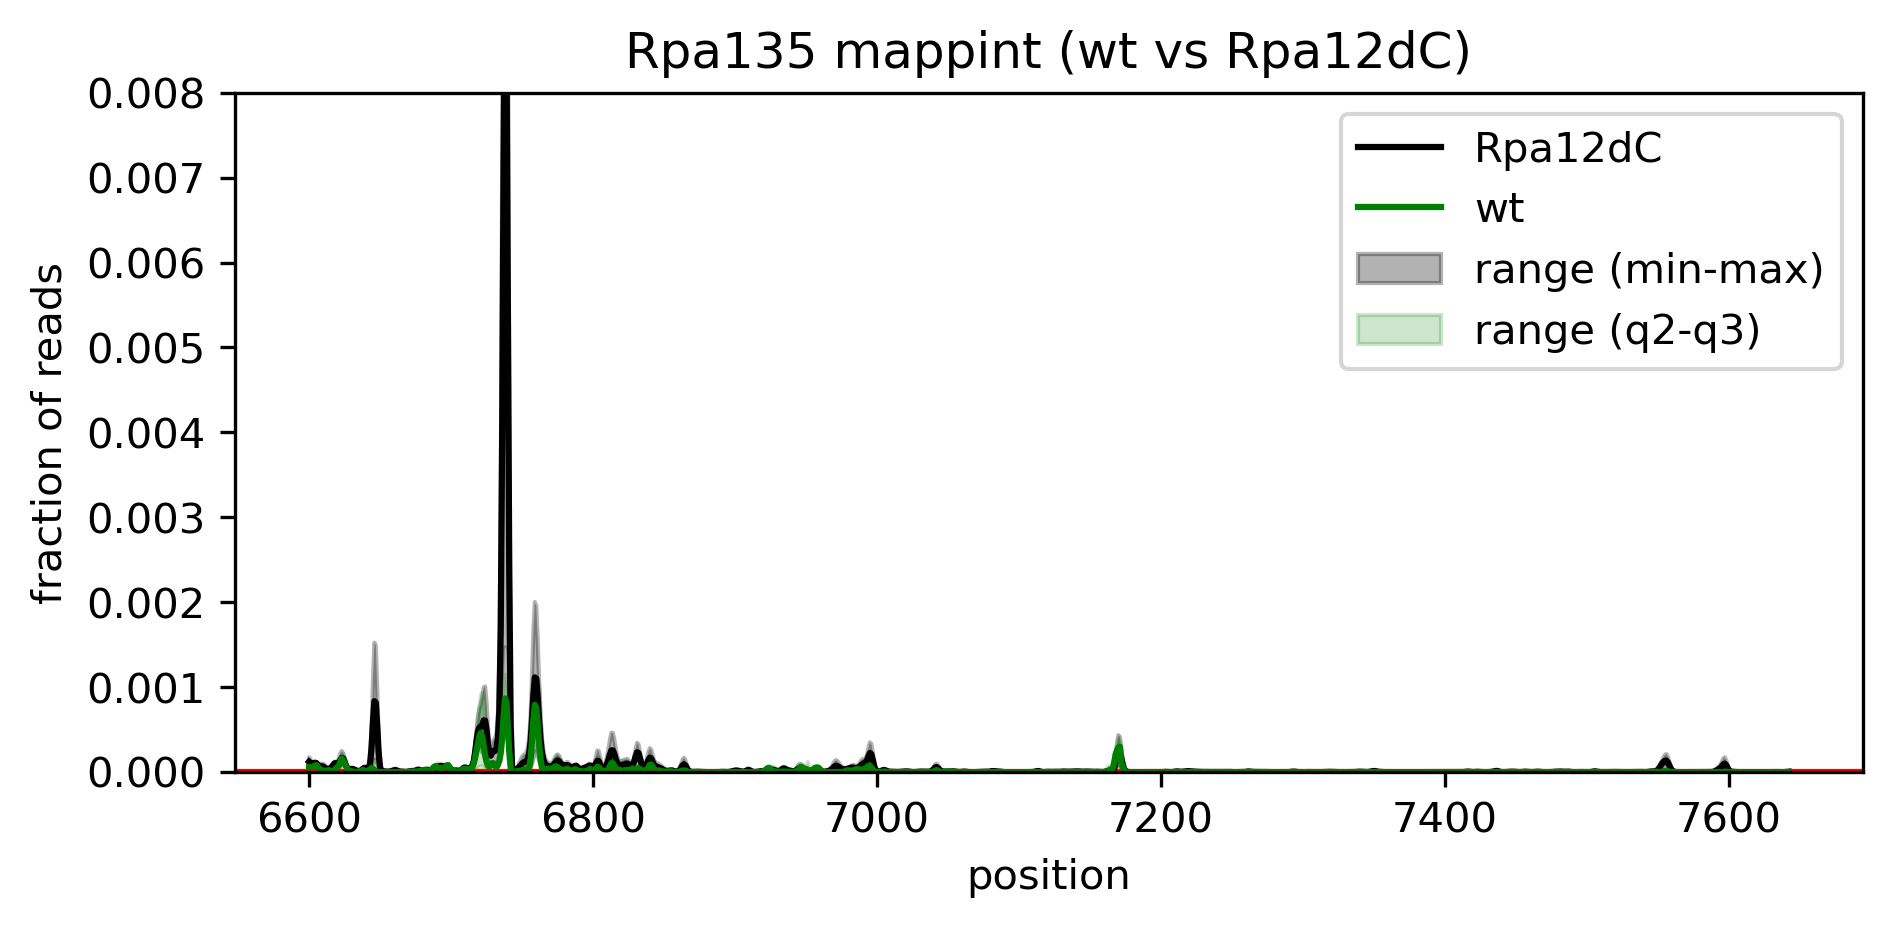

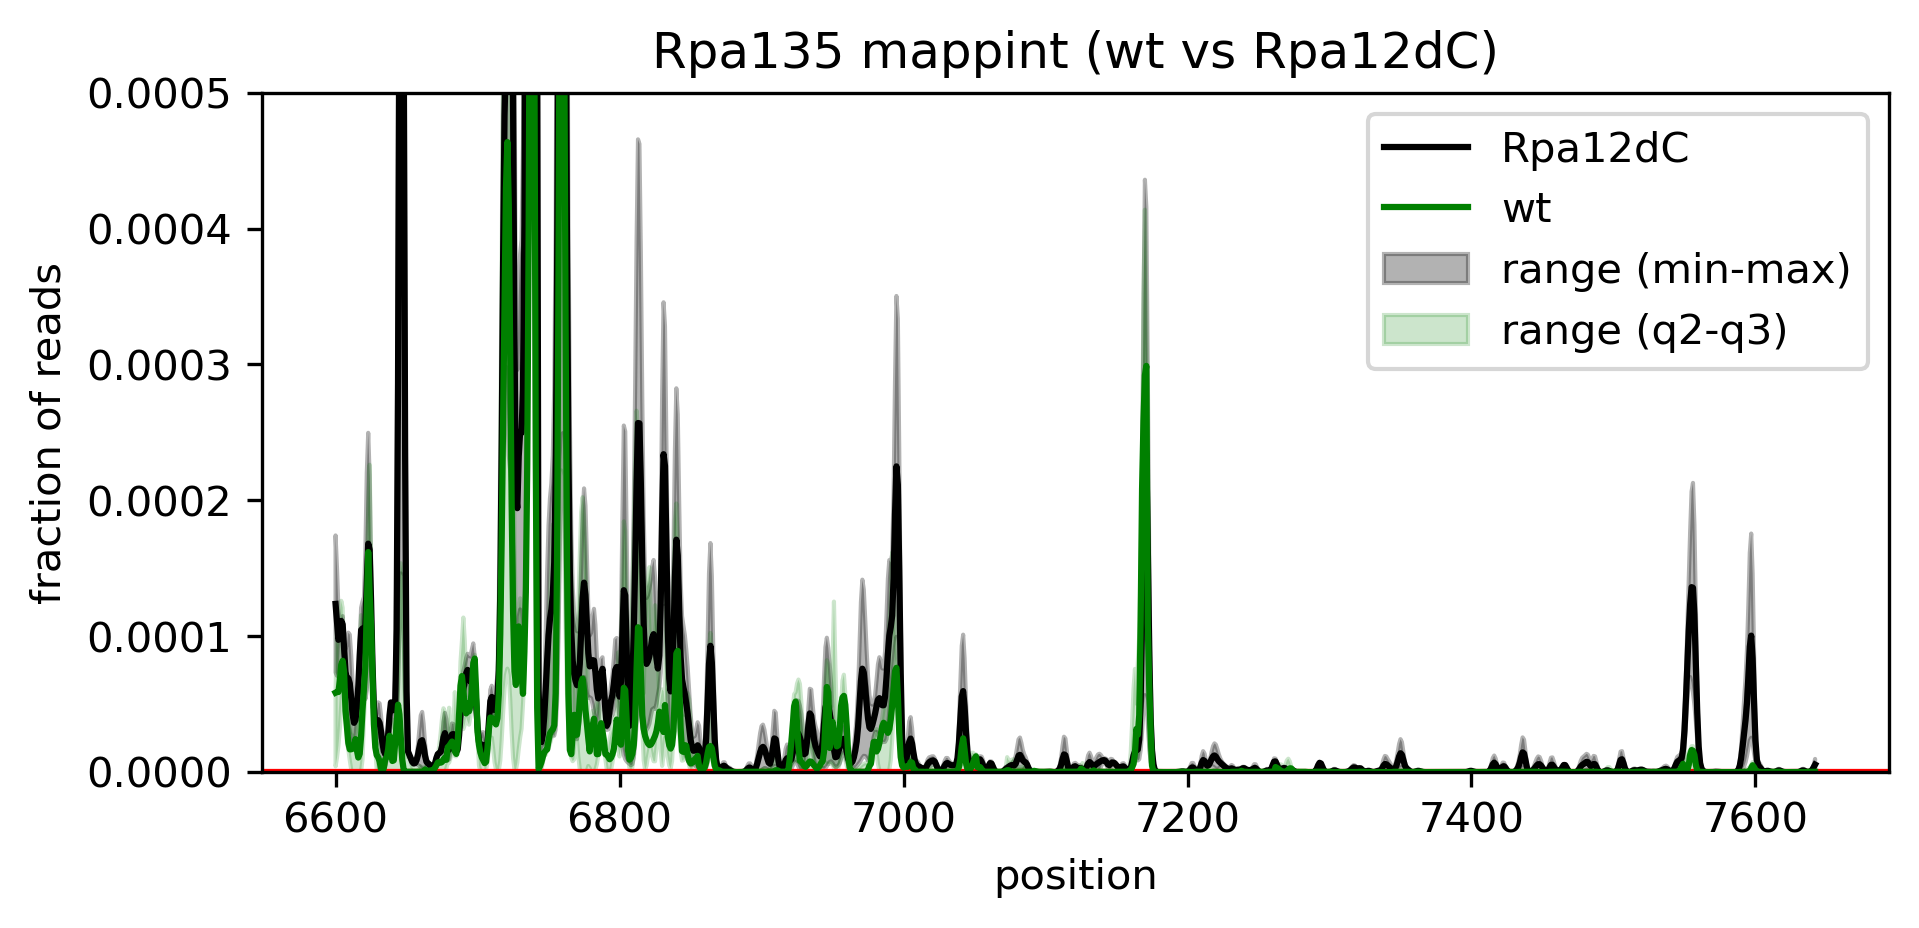

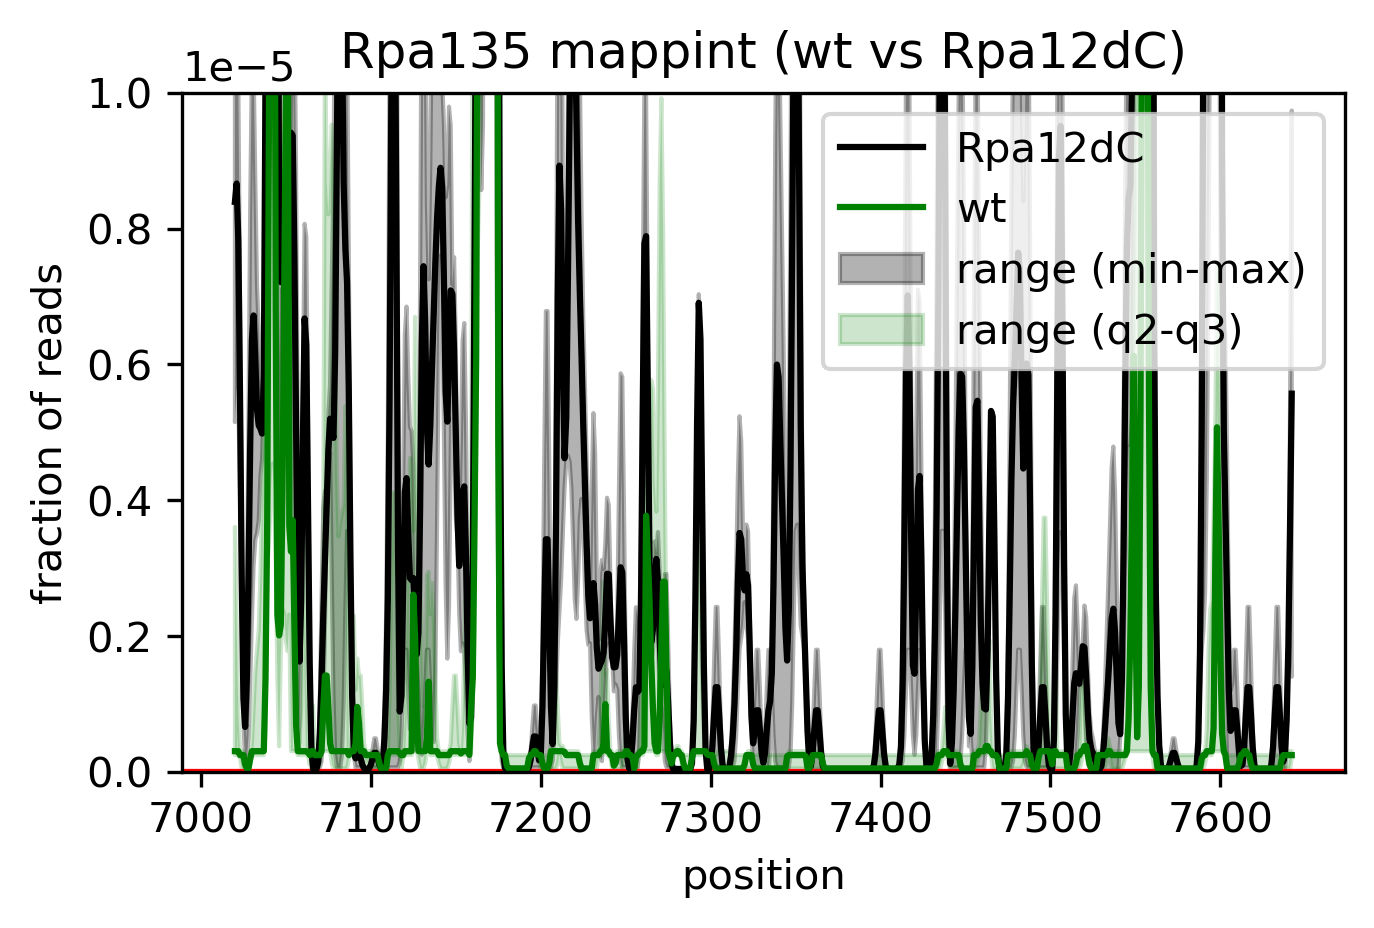

In [15]:
start=6600+300
stop=7900+300

tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(7,3),ref_label="wt",label="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 (wt vs Rpa12dC)",
                           dpi=300,offset=300, ylim=(0,0.008),
                           start=start, stop=stop, fname='Fig_xA.png')

tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(7,3),ref_label="wt",label="Rpa12dC",
                           title="Rpa135 mappint (wt vs Rpa12dC)",
                           dpi=300,offset=300, ylim=(0,0.0005),
                           start=start, stop=stop, fname='Fig_xB.png')

tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(5,3),ref_label="wt",label="Rpa12dC",
                           title="Rpa135 mappint (wt vs Rpa12dC)",
                           dpi=300,offset=300, ylim=(0,0.00001),
                           start=300+7020, stop=stop, fname='Fig_xB.png')

/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

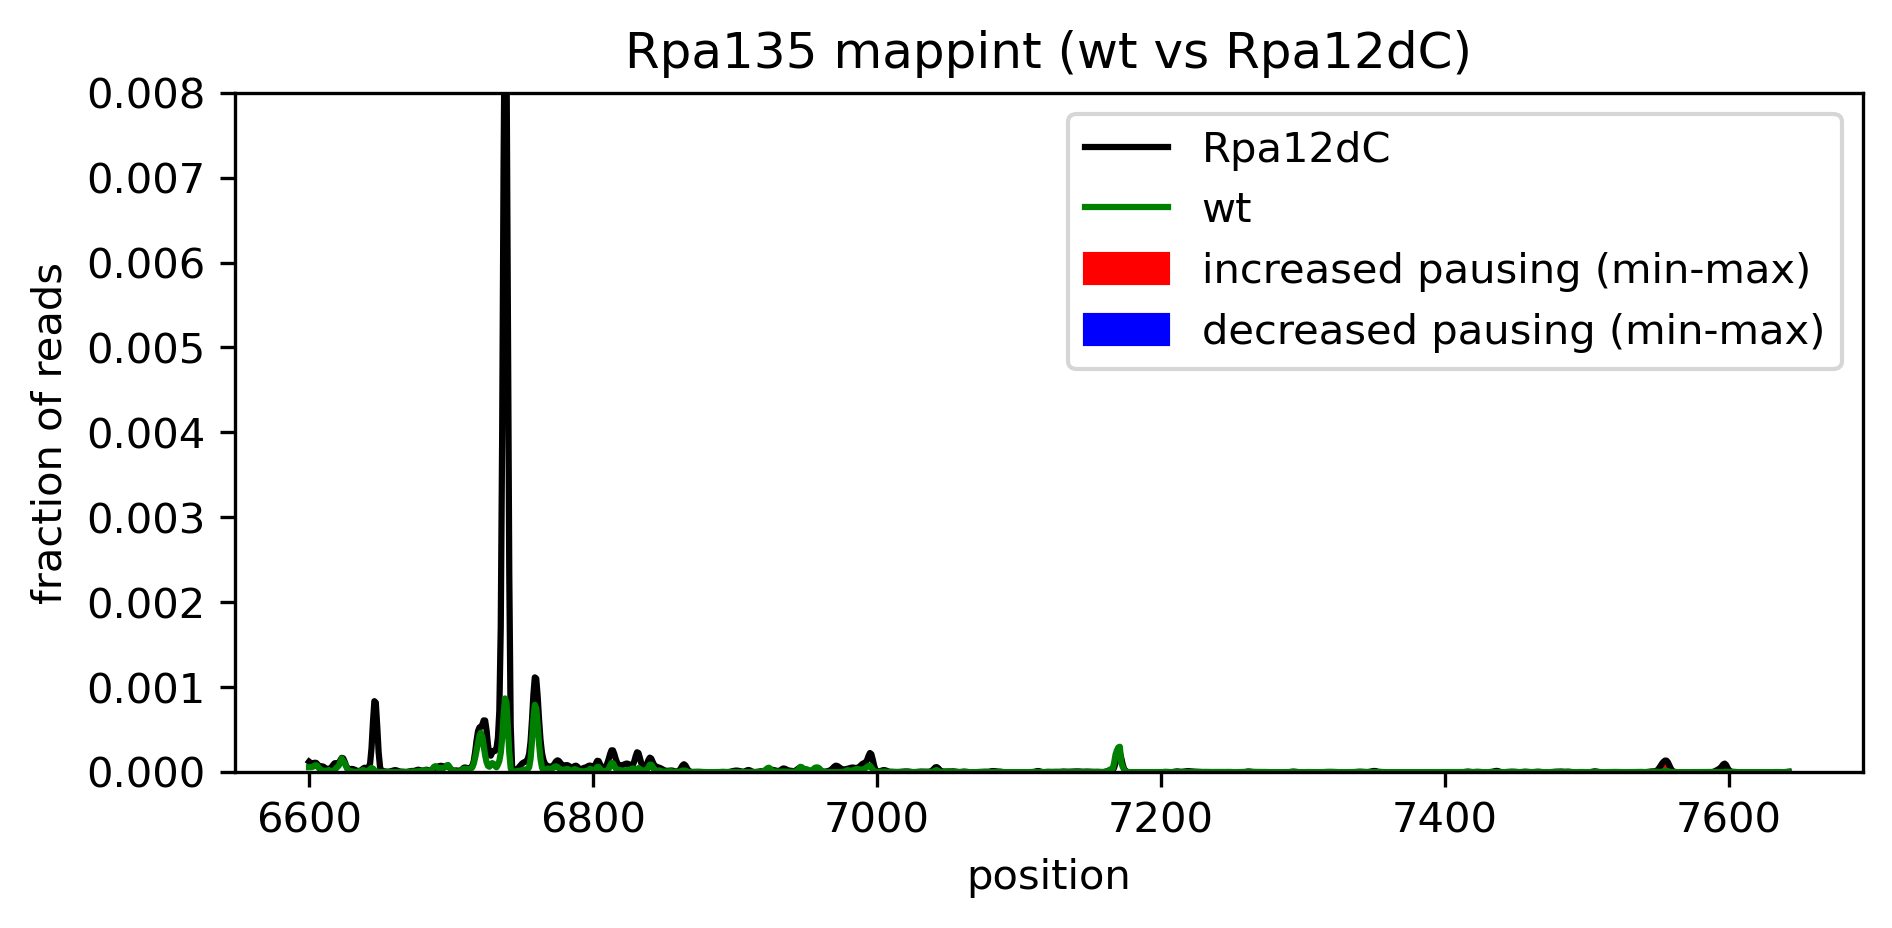

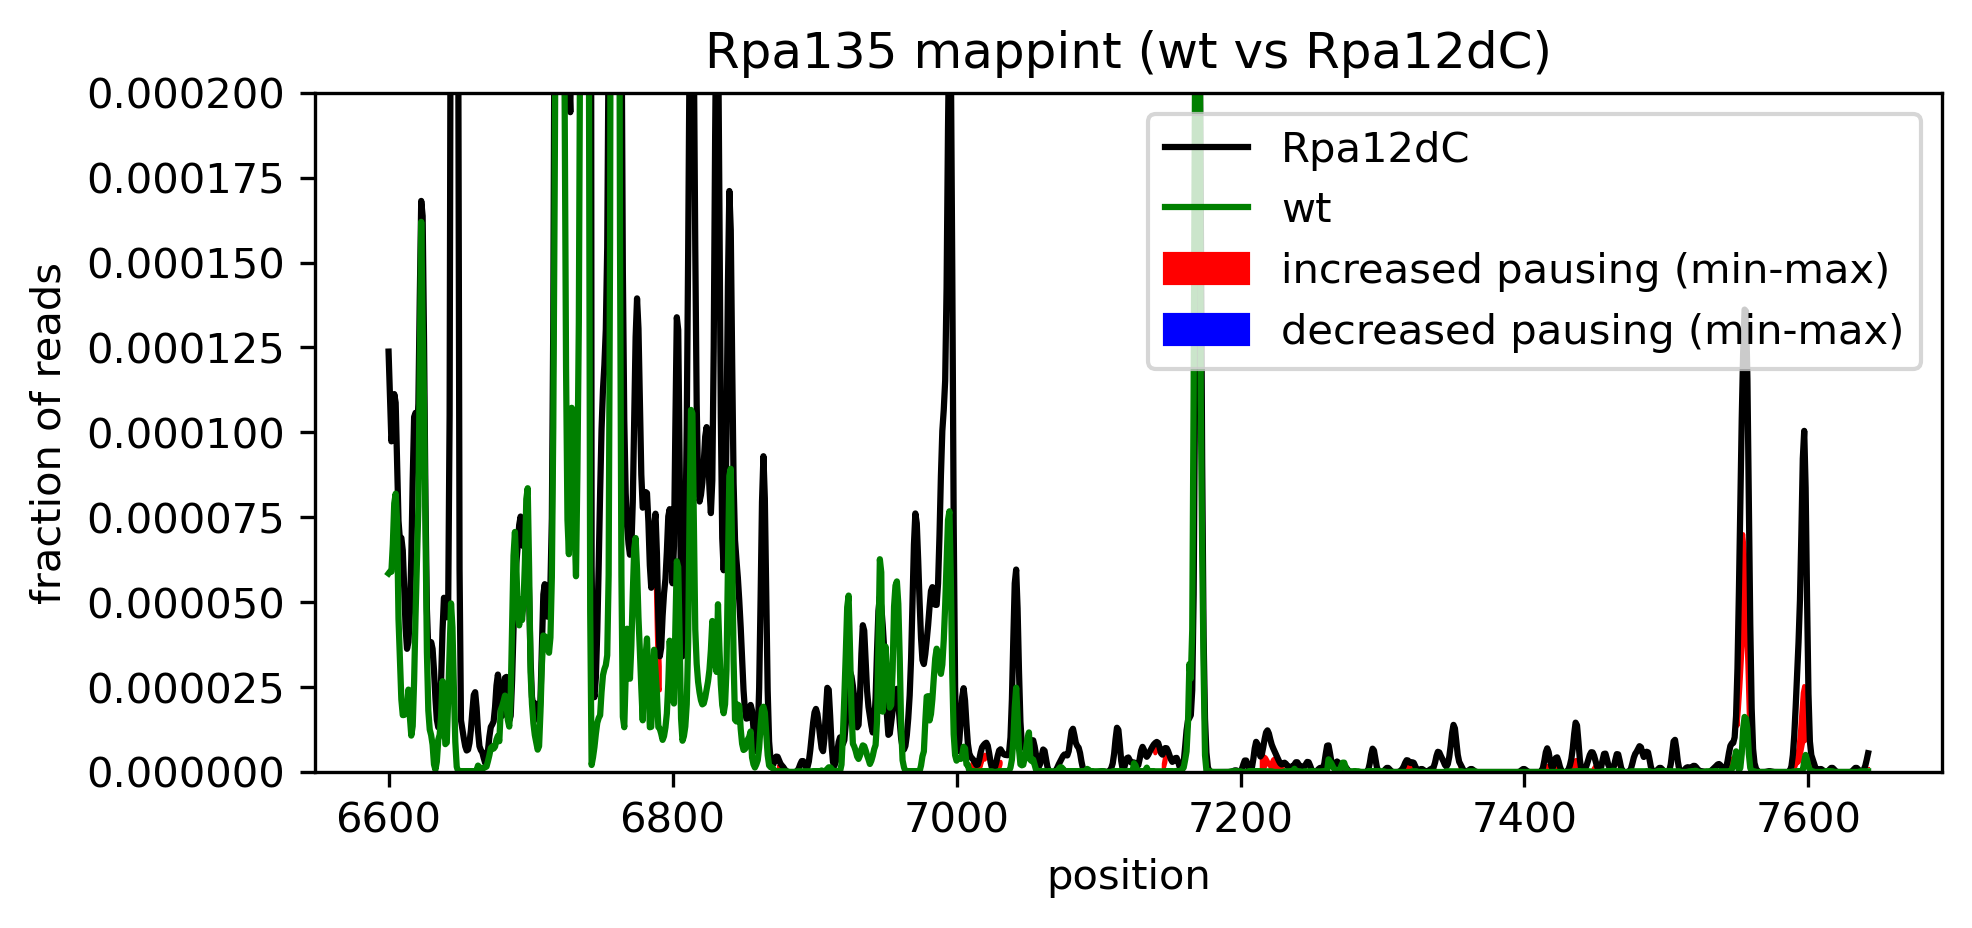

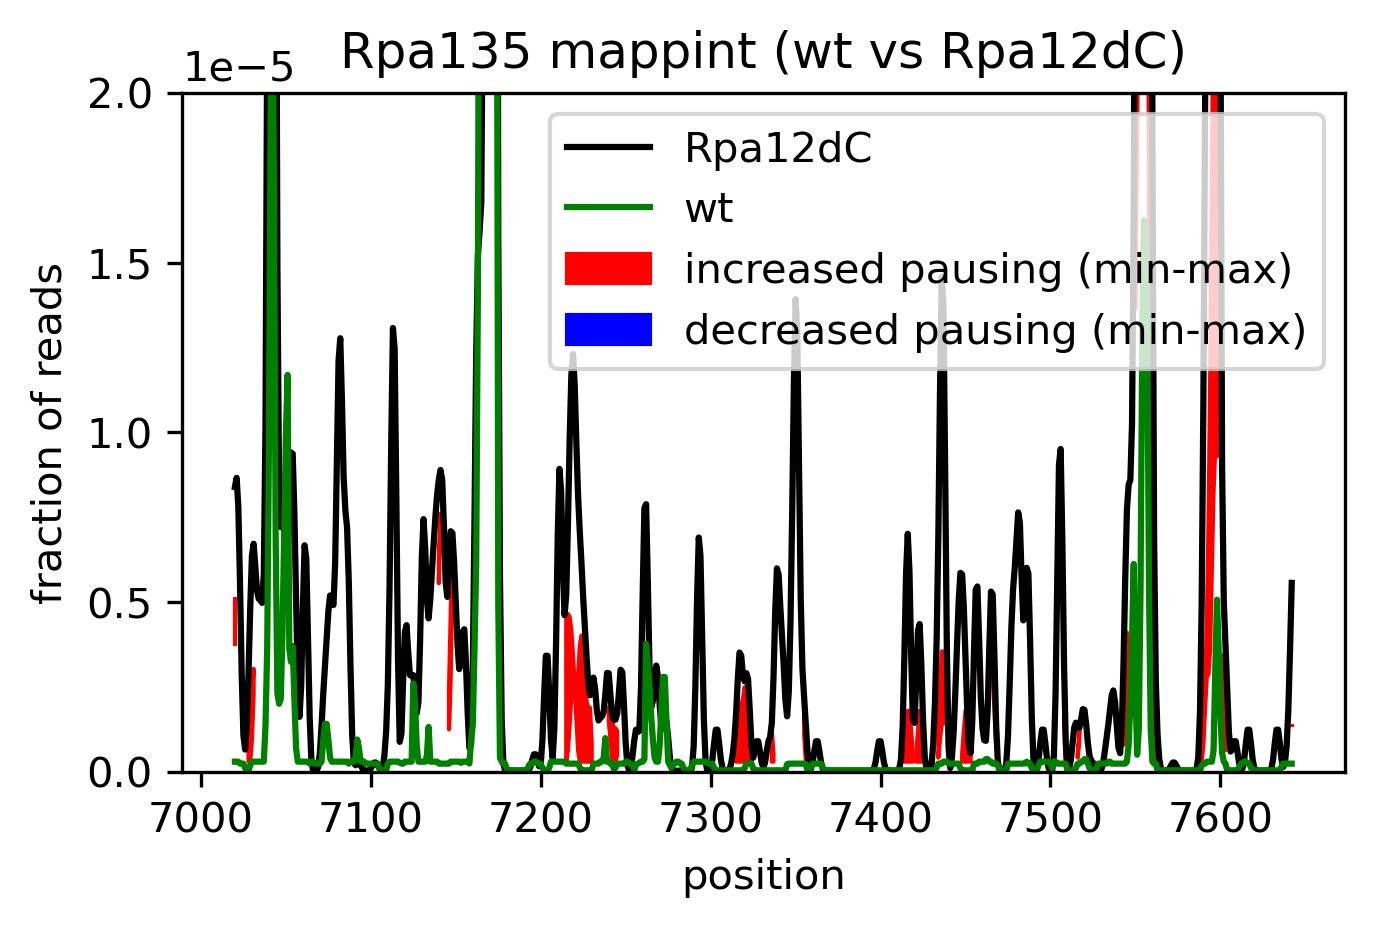

In [18]:
tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12dC",
                           title="Rpa135 mappint (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=300, ylim=(0,0.008),ranges='mm',
                           start=start, stop=stop, fname='Fig_xC.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12dC",
                           title="Rpa135 mappint (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=300, ylim=(0,0.0002),ranges='mm',
                           start=start, stop=stop, fname='Fig_xD.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(5,3),label1="wt",label2="Rpa12dC",
                           title="Rpa135 mappint (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=300, ylim=(0,0.00002),ranges='mm',
                           start=300+7020, stop=stop, fname='Fig_xD.png')